- ## Collaborative Filtering Recommender System : ( 2 ways / 2 programme )

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
column_names =[ 'user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv("u.data", sep = '\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [42]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [4]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [91]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title_x,title_y,title
0,196,242,3,881250949,Kolya (1996),Kolya (1996),Kolya (1996)
1,63,242,3,875747190,Kolya (1996),Kolya (1996),Kolya (1996)
2,226,242,5,883888671,Kolya (1996),Kolya (1996),Kolya (1996)
3,154,242,3,879138235,Kolya (1996),Kolya (1996),Kolya (1996)
4,306,242,5,876503793,Kolya (1996),Kolya (1996),Kolya (1996)


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [49]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [50]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [51]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Now set the number of ratings column:

In [52]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


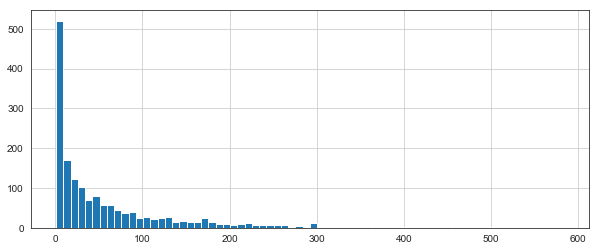

In [55]:
plt.figure(figsize = (10,4))
ratings['num of ratings'].hist(bins = 70)

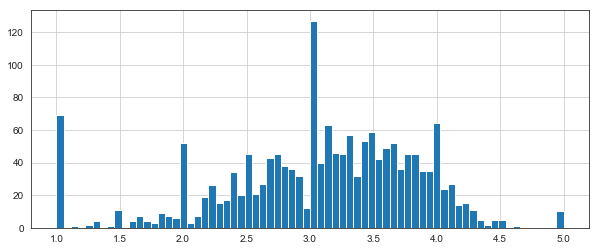

In [56]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

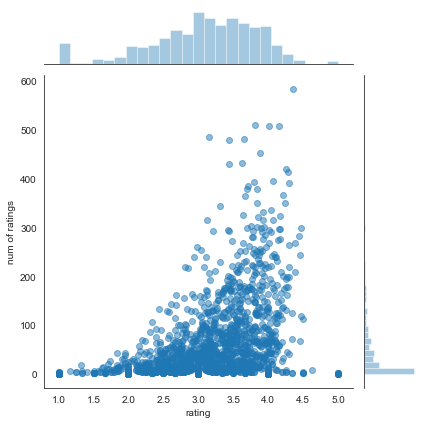

In [58]:
sns.jointplot(x = 'rating' , y = 'num of ratings' , data = ratings , alpha = 0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

### Recommending Similar Movies
Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [60]:
moviemat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


Most rated movie:

In [61]:
ratings.sort_values('num of ratings', ascending = False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [62]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now let's grab the user ratings for those two movies:

In [63]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [64]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [65]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [66]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [67]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice how the titles make a lot more sense:

In [68]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the same for the comedy Liar Liar:

In [69]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [74]:
con_air_user_ratings = moviemat['Con Air (1997)']
similar_to_con_air = moviemat.corrwith(con_air_user_ratings)

corr_con_air = pd.DataFrame(similar_to_con_air,columns=['Correlation'])
corr_con_air.dropna(inplace=True)
corr_con_air = corr_con_air.join(ratings['num of ratings'])
corr_con_air[corr_con_air['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Con Air (1997),1.000000,137
"Rainmaker, The (1997)",0.629809,145
My Left Foot (1989),0.616057,121
"Philadelphia Story, The (1940)",0.601457,104
Ghost (1990),0.568964,170
"Great Escape, The (1963)",0.566947,124
"Long Kiss Goodnight, The (1996)",0.565832,185
Young Guns (1988),0.557001,101
Seven Years in Tibet (1997),0.549505,155


In [ ]:
import pandas as pd
from scipy import sparse

In [109]:
column_names =[ 'user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv("u.data", sep = '\t', names = column_names)
movies = pd.read_csv("Movie_Id_Titles")
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [110]:
ratings = pd.merge(movies,ratings , on = 'item_id')#.drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head()

(100000, 5)


,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [80]:
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [81]:
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
#userRatings.fillna(0, inplace=True)
print("After: ",userRatings.shape)

Before:  (943, 1664)
After:  (943, 1144)


In [83]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(10)

title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),1.000000,0.059246,-0.001097,0.052877,0.128745,0.078260,0.015504,0.005750,0.221025,0.121153,...,0.057741,0.051950,-0.034417,0.000720,0.074635,0.109054,0.155450,0.115195,0.039172,-0.005917
12 Angry Men (1957),0.059246,1.000000,-0.014343,0.066339,0.230274,0.298716,0.339195,0.174500,0.019790,0.156721,...,0.048741,0.145040,0.138347,-0.004803,0.170189,0.160140,0.290188,0.164959,0.079341,0.038111
187 (1997),-0.001097,-0.014343,1.000000,0.078770,-0.010333,-0.039939,-0.021414,-0.006246,0.127531,0.017270,...,0.084986,-0.024094,-0.020299,0.115321,-0.025833,-0.000838,-0.021873,0.006811,0.053843,0.063789
2 Days in the Valley (1996),0.052877,0.066339,0.078770,1.000000,0.056283,0.090983,-0.019962,-0.008210,0.245191,0.129204,...,0.087568,0.069019,-0.001841,-0.026994,0.028208,0.116497,0.061328,0.197620,0.176032,0.146777
"20,000 Leagues Under the Sea (1954)",0.128745,0.230274,-0.010333,0.056283,1.000000,0.384535,0.274525,0.118108,0.117512,0.231247,...,0.244088,0.130652,0.062662,-0.001717,0.101581,0.286848,0.309511,0.243306,0.057977,0.071111
2001: A Space Odyssey (1968),0.078260,0.298716,-0.039939,0.090983,0.384535,1.000000,0.266171,0.200358,0.037861,0.264770,...,0.180504,0.078725,0.113774,-0.023812,0.262674,0.183051,0.429298,0.168440,0.071705,0.065870
"39 Steps, The (1935)",0.015504,0.339195,-0.021414,-0.019962,0.274525,0.266171,1.000000,0.295960,0.040896,0.094085,...,0.077421,0.081457,0.086217,0.023274,0.127264,0.137189,0.205543,0.057132,0.025560,0.016375
8 1/2 (1963),0.005750,0.174500,-0.006246,-0.008210,0.118108,0.200358,0.295960,1.000000,0.020419,0.051034,...,0.133663,0.141878,0.165348,-0.018537,0.094927,0.041004,0.170677,0.035488,0.022169,0.074051
Absolute Power (1997),0.221025,0.019790,0.127531,0.245191,0.117512,0.037861,0.040896,0.020419,1.000000,0.142817,...,0.128878,0.066173,-0.038617,-0.018542,0.038565,0.121793,0.100104,0.136609,0.135415,0.042236


In [84]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [103]:
movie1 = [("Abyss, The (1989)",5),("187 (1997)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in movie1:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
0,0.302884,0.391801,0.043174,0.323010,0.578118,0.661926,0.235212,0.127585,0.357043,2.500000,...,0.843806,0.191434,0.187228,-0.034657,0.367550,0.415055,0.512413,0.777486,0.526112,0.115436
1,-0.000548,-0.007172,0.500000,0.039385,-0.005166,-0.019969,-0.010707,-0.003123,0.063765,0.008635,...,0.042493,-0.012047,-0.010149,0.057661,-0.012917,-0.000419,-0.010937,0.003406,0.026922,0.031894
2,-0.135628,-0.336637,-0.016079,-0.190912,-0.541989,-0.643662,-0.260191,-0.209381,-0.188044,-0.632089,...,-0.391451,-0.126024,-0.068184,0.061498,-0.352395,-0.315111,-0.541395,-0.545795,-0.263221,-0.044334
3,-0.039130,-0.149358,0.019969,-0.045492,-0.192268,-0.500000,-0.133086,-0.100179,-0.018931,-0.132385,...,-0.090252,-0.039362,-0.056887,0.011906,-0.131337,-0.091526,-0.214649,-0.084220,-0.035853,-0.032935


In [94]:
similar_movies.sum().sort_values(ascending=False).head(20)

Abyss, The (1989)                                          1.744160
187 (1997)                                                 0.547064
Lord of Illusions (1995)                                   0.501412
Nightmare on Elm Street, A (1984)                          0.498507
Dirty Dancing (1987)                                       0.488813
Stephen King's The Langoliers (1995)                       0.474988
Fog, The (1980)                                            0.443672
Lawnmower Man, The (1992)                                  0.442772
Believers, The (1987)                                      0.442267
Interview with the Vampire (1994)                          0.437851
In the Mouth of Madness (1995)                             0.435764
Howling, The (1981)                                        0.432289
From Dusk Till Dawn (1996)                                 0.431432
Lawnmower Man 2: Beyond Cyberspace (1996)                  0.429611
Tales from the Crypt Presents: Bordello of Blood

In [104]:
movie2 = [("101 Dalmatians (1996)",5),("12 Angry Men (1957)",4)]
similar_movies = pd.DataFrame()
for movie,rating in movie2:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(20)

101 Dalmatians (1996)                           2.588870
12 Angry Men (1957)                             1.648116
Snow White and the Seven Dwarfs (1937)          1.104806
Mrs. Doubtfire (1993)                           1.088591
Lion King, The (1994)                           1.060537
Jack (1996)                                     0.995965
Hunchback of Notre Dame, The (1996)             0.976767
Santa Clause, The (1994)                        0.968450
Willy Wonka and the Chocolate Factory (1971)    0.950397
Dumbo (1941)                                    0.948143
Aladdin (1992)                                  0.946950
Jungle Book, The (1994)                         0.945186
Jurassic Park (1993)                            0.941365
Cinderella (1950)                               0.928393
Babe (1995)                                     0.915491
Hunt for Red October, The (1990)                0.909349
James and the Giant Peach (1996)                0.908318
Home Alone (1990)              

In [107]:
movie3 = [("101 Dalmatians (1996)",5)]
similar_movies = pd.DataFrame()
for movie,rating in movie3:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(20)

101 Dalmatians (1996)                              2.500000
Jack (1996)                                        0.996801
Homeward Bound II: Lost in San Francisco (1996)    0.896067
Twister (1996)                                     0.849623
Jungle Book, The (1994)                            0.842211
Father of the Bride Part II (1995)                 0.823325
Hunchback of Notre Dame, The (1996)                0.820325
Grumpier Old Men (1995)                            0.784224
First Kid (1996)                                   0.782211
Willy Wonka and the Chocolate Factory (1971)       0.777769
Mrs. Doubtfire (1993)                              0.765671
Lion King, The (1994)                              0.758329
Preacher's Wife, The (1996)                        0.752697
Casper (1995)                                      0.745184
Independence Day (ID4) (1996)                      0.742668
Homeward Bound: The Incredible Journey (1993)      0.733630
James and the Giant Peach (1996)        

- ## EDA

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [134]:
rat.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [142]:
rat1 = pd.DataFrame(rat.groupby('title')['rating'].mean())
rat1.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [135]:
rat.groupby('title')['rating'].count().sort_values(ascending = False).head()


title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [143]:
rat1['num of rating'] = pd.DataFrame(rat.groupby('title')['rating'].count())
rat1.head()

,rating,num of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


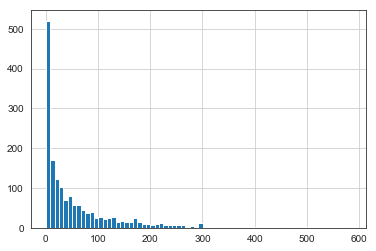

In [144]:
rat1['num of rating'].hist(bins = 70)

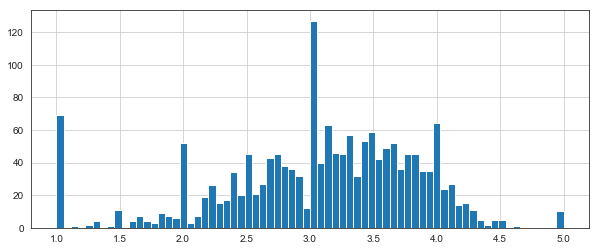

In [145]:
plt.figure(figsize = (10,4))
rat1['rating'].hist(bins = 70)

<Figure size 720x288 with 0 Axes>

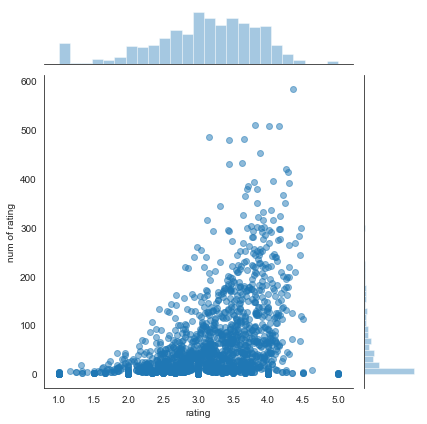

In [147]:
plt.figure(figsize = (10,4))
sns.jointplot(x = 'rating', y = 'num of rating', data = rat1, alpha = 0.5)